In [1]:
import cv2 as cv
import numpy as np
import os

In [2]:
dirDataSet = "../DataSet"

In [3]:
images = []
labels = []

for fruitType in os.listdir(dirDataSet):
    fruitTypePath = os.path.join(dirDataSet, fruitType)
    if os.path.isdir(fruitTypePath):
        for fruit in os.listdir(fruitTypePath):
            fruitPath = os.path.join(fruitTypePath, fruit)
            
            try :
                image = cv.imread(fruitPath)
                image = cv.resize(image, (256, 256))
                # normalize
                image =  cv.normalize(image, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
                images.append(image)
                labels.append(fruitType)
                # print(image)
            except Exception as e:
                # print(f"error:{e}")
                continue
            
                

In [4]:
print(labels[0])
print(images[0])

freshapples
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)

In [6]:
images  = np.array(images)
labels = np.array(labels)

In [7]:
images.shape, labels.shape

((5031, 256, 256, 3), (5031,))

In [8]:
from sklearn.model_selection import train_test_split

imgTrain,imgTemp,labelTrain,labelTemp = train_test_split(images,labels,test_size=0.3,random_state=42)

imgTest,imgVal,labelTest,labelVal = train_test_split(imgTemp,labelTemp,test_size=0.5, train_size=0.5,random_state=42)


In [9]:
imgTemp.shape,labelTemp.shape

((1510, 256, 256, 3), (1510,))

In [10]:
imgTrain.shape,labelTrain.shape

((3521, 256, 256, 3), (3521,))

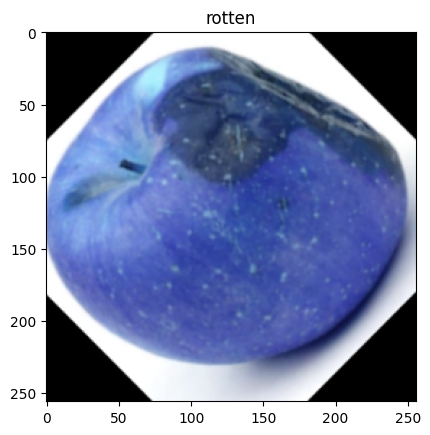

In [11]:
import matplotlib.pyplot as plt
frttype = ['fresh','rotten']
def sample_image(X,Y,index):
    plt.imshow(X[index])
    plt.title(frttype[Y[index]])
    plt.show()

sample_image(imgTrain,labelTrain,7)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow as tf
model = Sequential()

# Start adding layers
model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25)) 
model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25)) 

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [13]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(10))


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [15]:
# Preparing model to fit. Optimizer adam,loss function
model.compile(optimizer= "adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# history = model.fit(
#     imgTrain,labelTrain,epochs = 10, validation_data = (imgVal,labelVal)
# )

In [16]:
model.summary()
model.save("CNN_fruitclassification_model.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

C:\Users\Sarath Babu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model = load_model("CNN_fruitclassification_model1.h5")

In [24]:
import pickle
with open("training_history.pkl","rb") as file:
    history = pickle.load(file)

history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

24/24 - 10s - loss: 0.1035 - accuracy: 0.9629 - 10s/epoch - 429ms/step


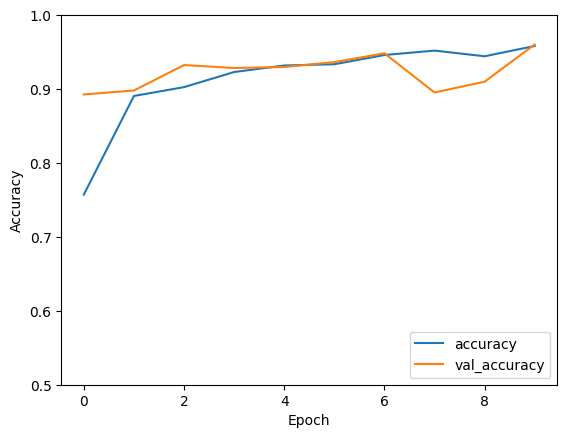

In [22]:
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imgTest,  labelTest, verbose=2)

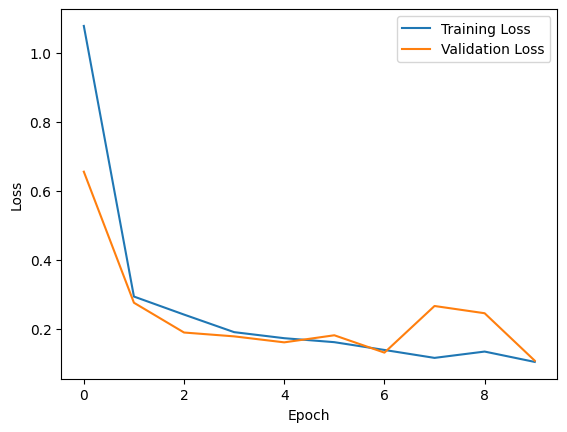

In [25]:
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# do testing
predictions = model.predict(imgTest)
predicted_labels = np.argmax(predictions, axis=1)
predictions

24/24 [==============================] - 14s 553ms/step


array([[  5.4568167,  10.092348 , -11.512538 , ...,  -8.368188 ,
        -14.078156 ,  -9.567535 ],
       [ 14.090141 ,   2.268211 ,  -9.392644 , ..., -10.358457 ,
        -11.966791 , -10.817978 ],
       [ 10.241534 ,   5.1228905,  -7.2229505, ...,  -5.472314 ,
         -9.821012 ,  -7.9329696],
       ...,
       [  4.365613 ,   8.148033 , -10.062881 , ...,  -6.0688457,
        -11.727757 ,  -8.967158 ],
       [  1.6899018,   8.828228 ,  -9.918646 , ...,  -6.7992916,
        -10.262654 ,  -8.144158 ],
       [  9.7639475,   3.7280517,  -7.1398287, ...,  -8.848392 ,
         -9.95107  ,  -8.397215 ]], dtype=float32)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(labelTest, predicted_labels)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(labelTest, predicted_labels))

# Confusion Matrix
cm = confusion_matrix(labelTest, predicted_labels)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       322
           1       0.98      0.95      0.97       433

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755

Confusion Matrix:
[[314   8]
 [ 20 413]]


: 

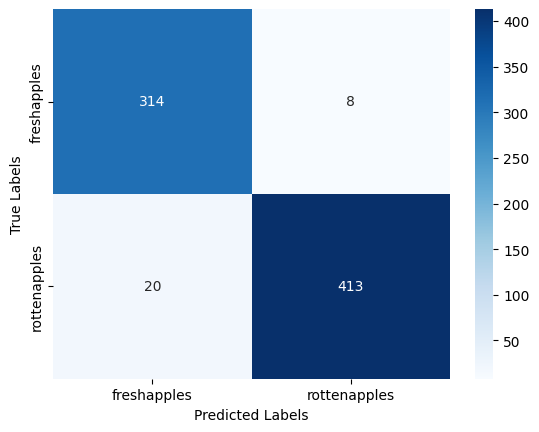

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Create confusion matrix
cm = confusion_matrix(labelTest, predicted_labels)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


24/24 [==============================] - 12s 488ms/step


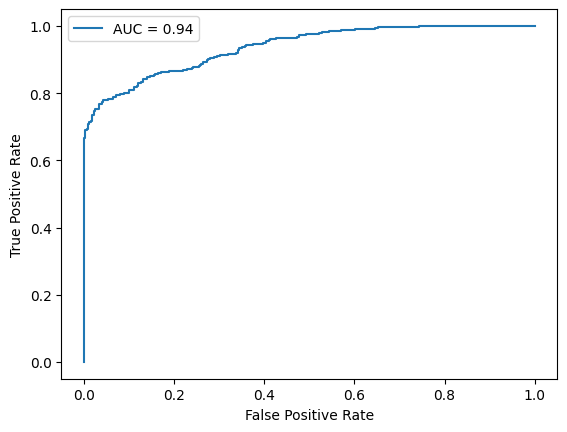

In [28]:
from sklearn.metrics import roc_curve, auc

# Get binary predictions
binary_predictions = model.predict(imgTest)[:, 1]

# Compute ROC curve and area under the curve
fpr, tpr, _ = roc_curve(labelTest, binary_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


1/1 [==============================] - 0s 234ms/step


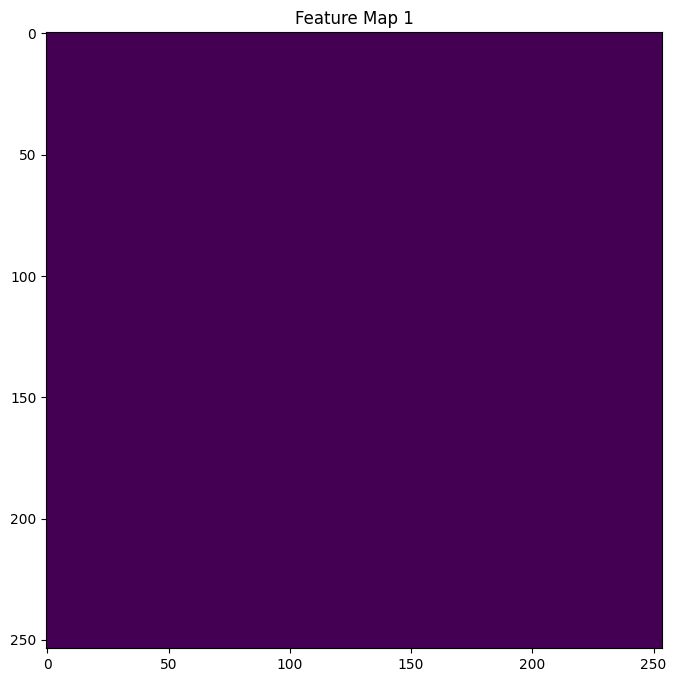

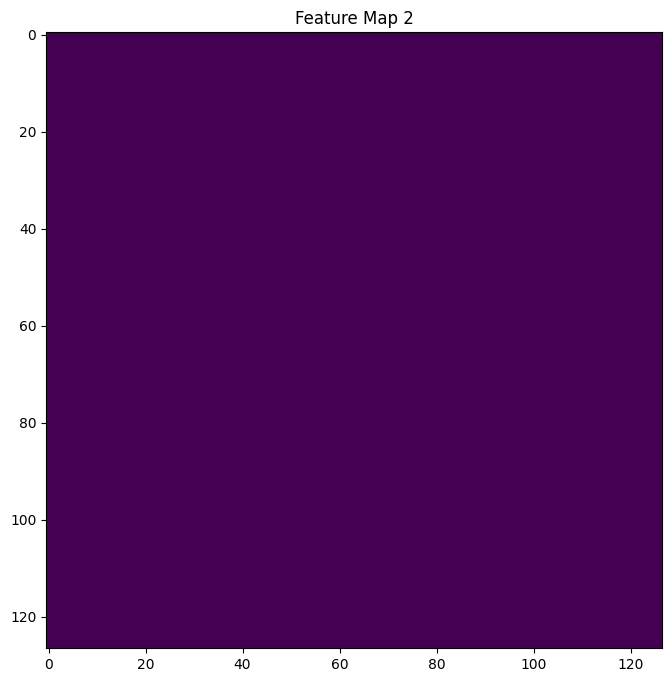

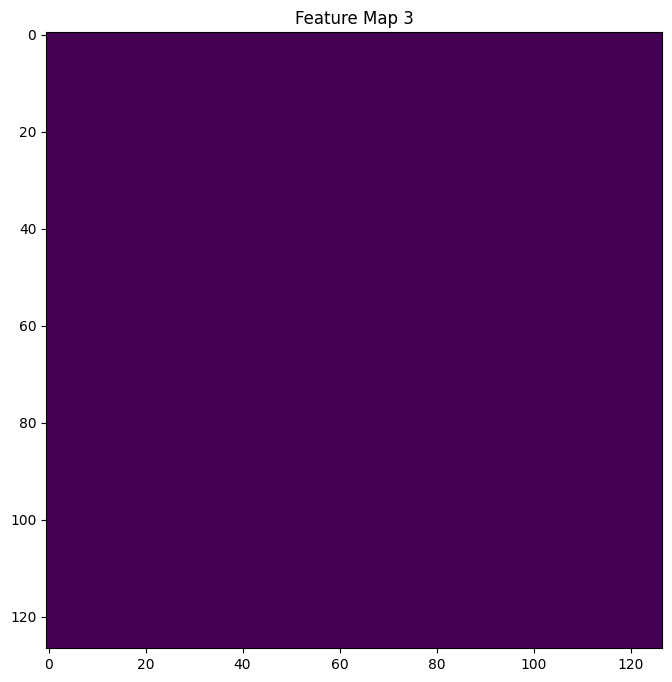

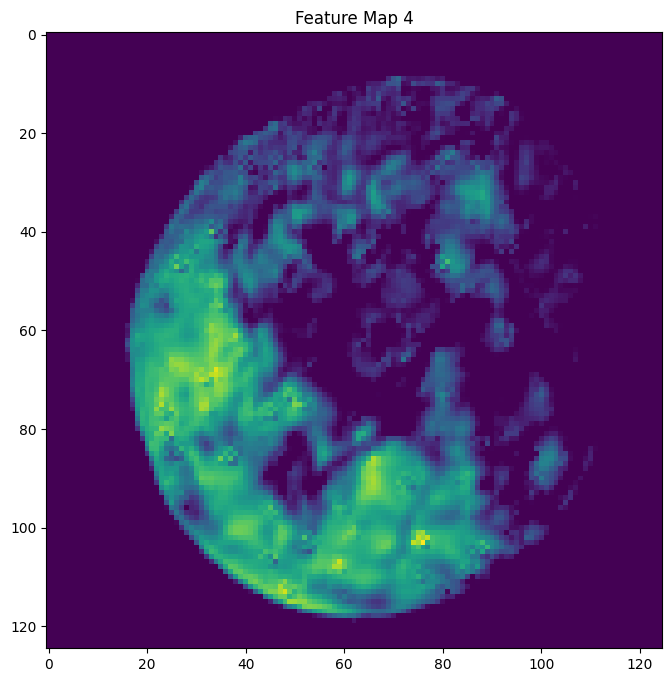

In [29]:
from tensorflow.keras.models import Model

# Extract intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers[:4]]  # Adjust the index for the desired layer
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(imgTest[0].reshape(1, 256, 256, 3))

# Visualize feature maps
for i, activation in enumerate(activations):
    plt.figure(figsize=(8, 8))
    plt.imshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(f'Feature Map {i + 1}')
    plt.show()
